# 数据来源及背景

数据来源: https://www.kaggle.com/jiangzuo/hr-comma-sep/version/1

数据背景: 该数据集是指某公司员工的离职数据, 其包含14999个样本以及10个特征, 这10个特征分别为: 员工对公司满意度, 最新考核评估, 项目数, 平均每月工作时长, 工作年限, 是否出现工作事故, 是否离职, 过去5年是否升职, 岗位, 薪资水平. 

任务：员工离职，似乎已经成为每一家企业都要面对的问题，特别是优秀人才离职的问题会让领导特别头疼。通过kaggle上某一家企业员工离职的真实数据来对离职率进行分析建模，并对预测结果显示要离职的员工提出挽留建议。

# 明确分析目的
首先需要对影响员工离职的因素进行分析
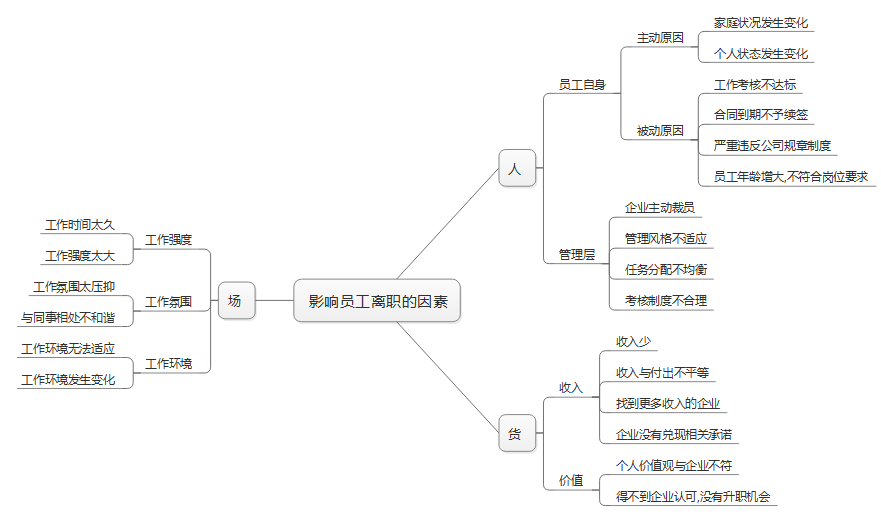

将上述影响因素与现有的数据相结合来提出问题，进而明确我们的分析目的：

1) 员工对公司满意度平均水平如何？员工的最新考核情况又是如何？员工所参加项目数是怎样？员工平均每月工作时长以及平均工作年限分别是多少？

2) 当前离职率是多少？工作事故发生率？过去5年升职率？薪资水平又如何？共有多少种岗位？

3) 是否离职和其他9个特征的关系如何？

4) 根据现有数据, 如何对某个员工是否离职进行预测？

5) 针对当前的员工离职情况，企业该如何对待呢？

# 观察数据

In [44]:
# 导入库
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['KaiTi']

In [2]:
data = pd.read_csv('./HR_comma_sep.csv')

In [3]:
print(data.shape)
data.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


数据维度14999行×10列, 除过岗位和薪资水平是字符型外, 其余均是数字 (具体是什么类型还需要进一步确定).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


前两个特征为64位浮点型, 后两个为字符型, 其余为64位整型, 且均无缺失值.

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


员工对公司的满意度: 范围 0.09~1, 中位数0.640, 均值0.613, 总体来说员工对公司较满意

最新考核评估: 范围 0.36~1, 中位数0.720, 均值0.716, 员工考核平均水平中等偏上.

项目数: 范围 2~7个, 中位数4, 均值3.8, 平均参加项目数为4个

平均每月工作时长: 范围96~310小时, 中位数200, 均值201

工作年限: 范围2~10年, 中位数3, 均值3.5

当前离职率为23.81%

工作事故发生率14.46%.

过去5年升职率2.13%.

In [6]:
data.describe(include=['O'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


员工岗位有10种, 其中最多的是销售, 多达4140人.

薪资水平共有3个等级, 最多的是低等, 多达7316人.

# 数据预处理

## 处理缺失值
没有缺失值, 因此不用处理缺失值. 

## 异常值
通过箱线图查看异常值.

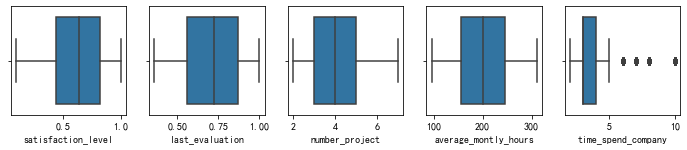

In [7]:
cols = data.columns[:5] # Work_accident,left,promotion_last_5years,sales,salary都是0-1数据或者字符数据，不能通过箱线图看

fig, ax = plt.subplots(1,len(cols), figsize=(12, 2))
for i in range(len(cols)):
    sns.boxplot(x=data.columns[i], data=data, ax=ax[i])

除了工作年限外, 其他均无异常值. 该异常值也反映了该公司员工中以年轻人为主 

# 可视化分析

## 人力资源总体情况

In [8]:
# 查看离职人数
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

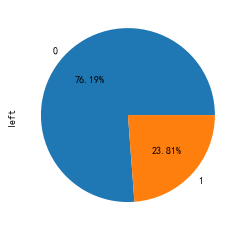

In [9]:
# 查看离职率
data.left.value_counts().plot(kind='pie',autopct='%1.2f%%')

## 对公司满意度与是否离职的关系

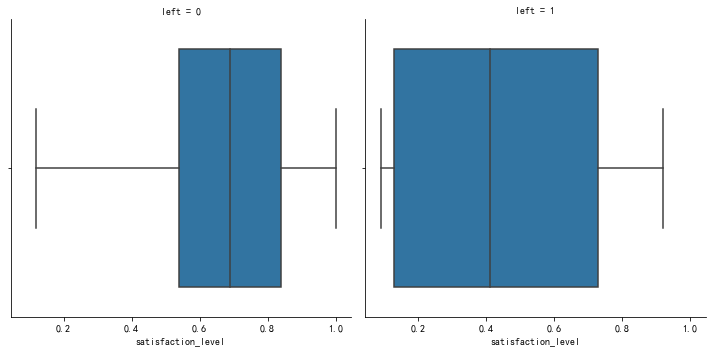

In [10]:
sns.catplot(kind='box',x='satisfaction_level',col='left',data=data)
# data.groupby('left').satisfaction_level.plot(kind='box')

就中位数而言, 离职人员对公司满意度相对较低, 且离职人员对公司满意度整体波动较大. 另外离职人员中没有满意度为1的评价.

## 最新考核评估与是否离职的关系

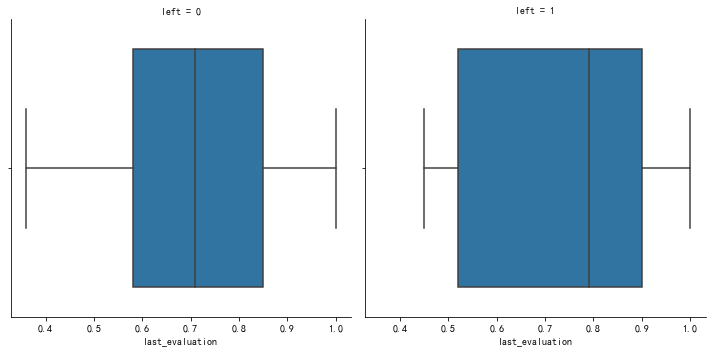

In [11]:
sns.catplot(kind='box',x='last_evaluation',col='left',data=data)

就中位数而言, 离职人员的最新考核评估相对较高, 但其波动也大. 

## 所参加项目与是否离职的关系

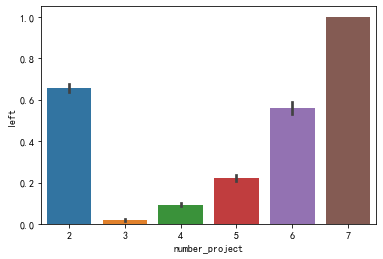

In [12]:
sns.barplot(x='number_project',y='left',data=data)

通过下图可以发现以下2点:

- 离职率随着项目数的增多而增大, 2个项目数是特例

- 项目数为2的这部分人可能是工作能力不被认可, 其离职人数也相对较多; 项目数为6, 7的这部分人一方面体现的是工作能力较强, 另一方面也说明了工作强度大, 其可能在其他企业能有更好的发展, 自然离职率也相对较高.

## 工作年限和是否离职的关系

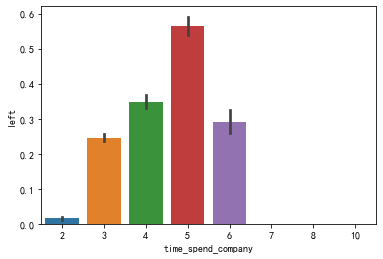

In [13]:
sns.barplot(x='time_spend_company',y='left',data=data)

在各工作年限中, 离职人员较集中于3, 4, 5, 6年, 而6年以上则相对稳定

## 5年内是否升职与是否离职的关系

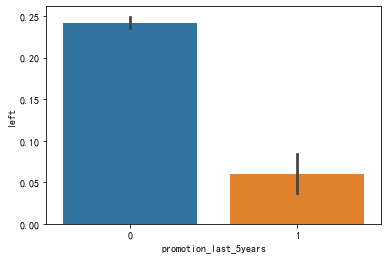

In [14]:
sns.barplot(x='promotion_last_5years',y='left',data=data)

5年内多数人没有升职, 离职率就相对较高.

In [15]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
data.describe(include=['O'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


# 特征工程

## 离散型数据处理
离散型数据可分为两种: 一种是定序, 一种是定类.

### 定序
薪资水平其含有顺序意义, 因此将其字符型转化为数值型

In [17]:
data.salary = data.salary.map({"low": 0, "medium": 1, "high": 2})
data.salary.unique()

array([0, 1, 2], dtype=int64)

### 定类
岗位是定类型变量, 对其进行one-hot编码, 这里直接利用pandas的get_dummies方法.

In [22]:
data = pd.get_dummies(data,prefix='dep')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### 连续型特征归一化处理

In [24]:
hours = data.average_montly_hours
data.average_montly_hours = (hours-hours.mean())/hours.std()

In [41]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.38,0.53,2,-0.882010,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,1.220382,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,1.420610,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,0.439493,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,-0.841965,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# 模型选择

## 划分数据

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#划分训练集和测试集
xdata = data.drop(columns=['left'])
ydata = data['left']

train_x, test_x, train_y, test_y = train_test_split(xdata, ydata, test_size=0.2, random_state=10)

In [28]:
print(train_x.shape,test_x.shape)
print(train_y.shape,test_y.shape)

(11999, 18) (3000, 18)
(11999,) (3000,)


## 逻辑回归

In [29]:
from sklearn.linear_model import LogisticRegression

In [33]:
%%time
lr = LogisticRegression(solver='liblinear')
lr.fit(train_x, train_y)

Wall time: 46.9 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_hat = lr.predict(test_x)

In [35]:
from sklearn.metrics import classification_report

In [37]:
print('测试集:')
print(classification_report(test_y, y_hat))

测试集:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2266
           1       0.63      0.37      0.47       734

    accuracy                           0.79      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.77      0.79      0.77      3000



In [71]:
row = np.array([0.47, 0.53, 2, -0.882010, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]).reshape(1, -1)

In [72]:
lr.predict(row)

array([0], dtype=int64)